In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal375.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal561.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal341.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal688.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal374.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal427.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal94_jpg.rf.049c9551c57f33355c0e7a005ae21e12.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal383.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal741_jpg.rf.b73aef6a4a59f4a0eb0ac1e012f0a1d5.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset/metal/metal63_jpg.rf.e8e46793a7f743816103ff68a0e7d304.jpg
/kaggle/input/smart-garbage-classifier-using-cnn/Final Dataset

In [18]:
# 🔹 Libraries Import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 🔹 Dataset Path Check
dataset_path = "/kaggle/input/smart-garbage-classifier-using-cnn"  # Update if different
if os.path.exists(dataset_path):
    print("✅ Dataset path found:", dataset_path)
else:
    print("❌ Dataset path not found. Check the dataset attachment!")

2025-09-15 09:42:39.233415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757929359.487657      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757929359.561103      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ Dataset path found: /kaggle/input/smart-garbage-classifier-using-cnn


Found 7020 images belonging to 1 classes.
Found 1755 images belonging to 1 classes.


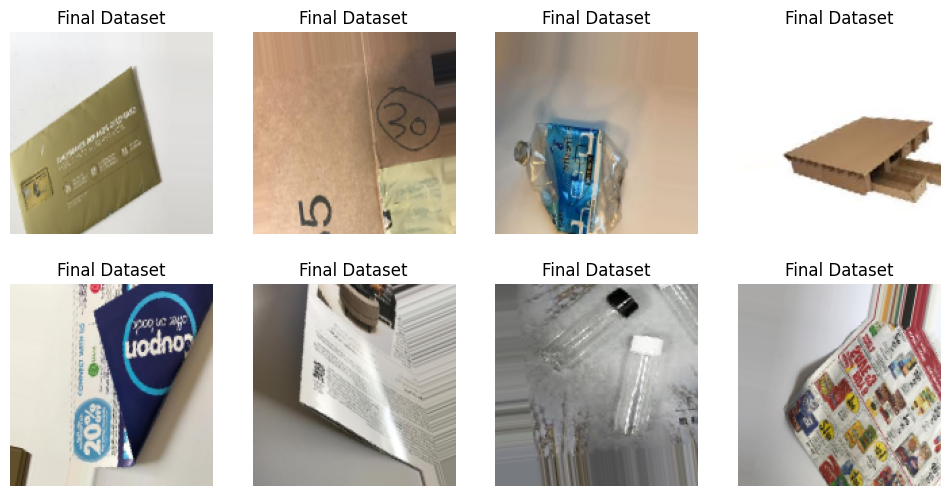

In [19]:
# 🔹 Image Data Generator (Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 🔹 Training & Validation Data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),  # Image size
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# 🔹 Sample Preview
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_batch[i])
    plt.title(list(train_generator.class_indices.keys())[np.argmax(y_batch[i])])
    plt.axis('off')
plt.show()


In [20]:
# 🔹 CNN Model Architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# 🔹 Compile Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 🔹 Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-15 09:43:36.441249: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 223s 994ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 219s 993ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 199s 905ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 200s 894ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 198s 898ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


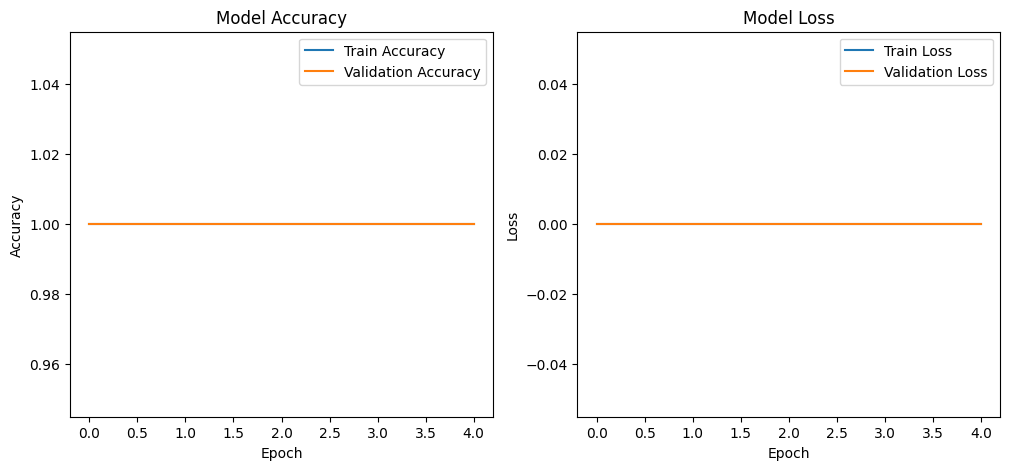

In [21]:
# 🔹 Model Training
epochs = 5     
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

# 🔹 Training History Plot
plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


55/55 ━━━━━━━━━━━━━━━━━━━━ 22s 387ms/step


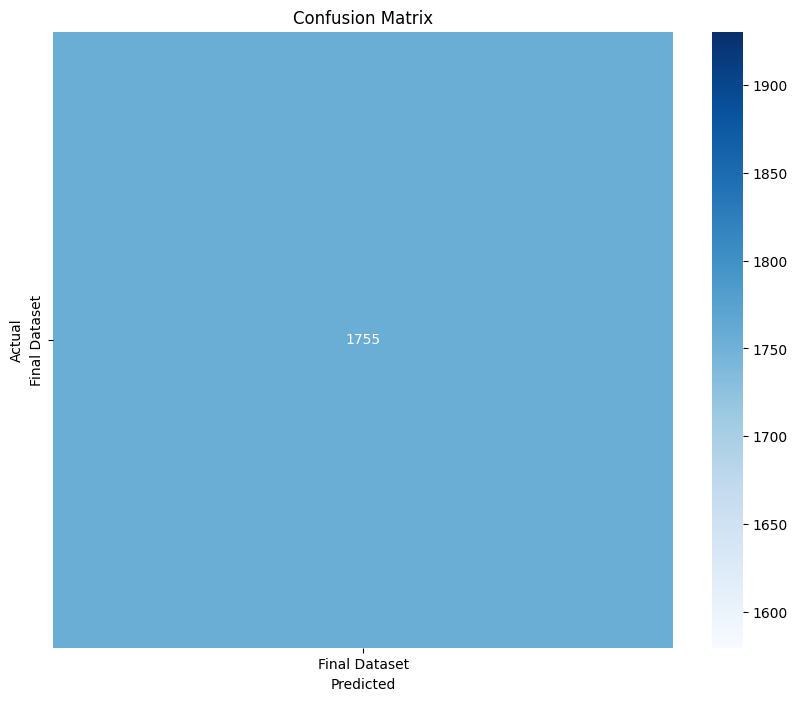

Classification Report:

               precision    recall  f1-score   support

Final Dataset       1.00      1.00      1.00      1755

     accuracy                           1.00      1755
    macro avg       1.00      1.00      1.00      1755
 weighted avg       1.00      1.00      1.00      1755



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 🔹 Get predictions
validation_generator.reset()
Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)

# 🔹 Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(validation_generator.class_indices.keys()),
            yticklabels=list(validation_generator.class_indices.keys()))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# 🔹 Classification Report
print("Classification Report:\n")
print(classification_report(validation_generator.classes, y_pred,
                            target_names=list(validation_generator.class_indices.keys())))


In [23]:
# 🔹 Check dataset folders
!ls /kaggle/input/


smart-garbage-classifier-using-cnn


In [24]:
import os, pickle
os.makedirs('results', exist_ok=True)

# Save trained model
model.save('results/smart-garbage-classifier-using-cnn.h5')

# Save training history
with open('results/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print("✅ Model & history saved in 'results/' folder")


✅ Model & history saved in 'results/' folder


In [25]:
import matplotlib.pyplot as plt
import pickle

# Load history back (safety)
with open('results/history.pkl', 'rb') as f:
    history_dict = pickle.load(f)

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Val Accuracy')
plt.legend(); plt.title('Accuracy')

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')

plt.savefig("accuracy_loss.png", bbox_inches='tight')
plt.close()

print("✅ accuracy_loss.png saved")


✅ accuracy_loss.png saved


In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

val_steps = len(validation_generator)
validation_generator.reset()
Y_pred = model.predict(validation_generator, steps=val_steps)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=list(validation_generator.class_indices.keys()),
            yticklabels=list(validation_generator.class_indices.keys()))
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png", bbox_inches='tight')
plt.close()

print("✅ confusion_matrix.png saved")


55/55 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step
✅ confusion_matrix.png saved
